In [437]:
import numpy as np
import cv2
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

rdhaar='/home/charles/opencv/data/haarcascades/'
rdmod = '/media/charles/1TB/Users/Charles Olivier/Downloads/ACHRI Models/vgg_face_caffe/'
rdimg='/home/charles/Dropbox/Affective/Data/train_all/awe/faces/'
tp = '/home/charles/Documents/UCL/ACHRI/models/test-pics/'

from skimage import transform
model = rdmod+'VGG_FACE_deploy.prototxt'
weights = rdmod+'VGG_FACE.caffemodel'
# change this to your install dir
caffe_root = '~/Downloads/caffe-master/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe
mean = np.array([129.1863,104.7624,93.5940])

In [457]:
idx=0
x=np.zeros((1000,3))
for file in os.listdir(rdimg):
    img=mpimg.imread(rdimg+file)
    x[idx,0] = np.mean(img[:,:,0])
    x[idx,1] = np.mean(img[:,:,1])
    x[idx,2] = np.mean(img[:,:,2])
    idx+=1
mean=np.mean(x[:idx,:], axis=0)

In [458]:
im = 'awe painting - Google Search-035.jpeg'


face_cascade = cv2.CascadeClassifier(rdhaar+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(rdhaar+'haarcascade_eye.xml')
img = cv2.imread(rdimg+im,0)

### Extracting faces using Haar Cascade Filters

array([[66, 35, 89, 89]], dtype=int32)

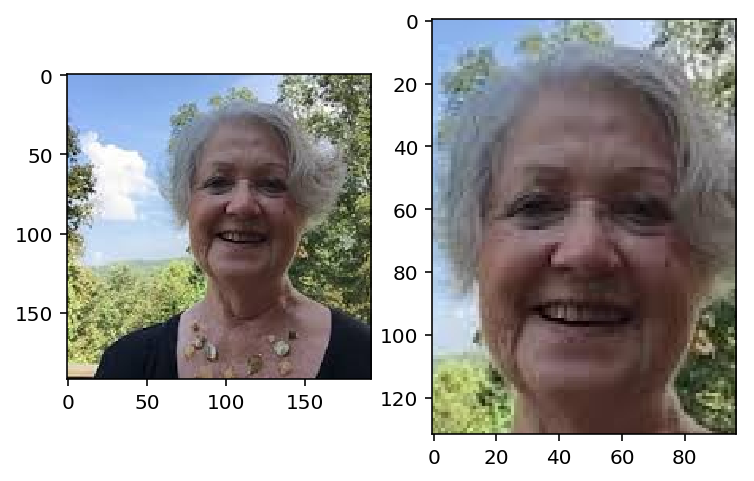

In [459]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)
for (x,y,w,h) in faces:
    img=mpimg.imread(rdimg+im)
    dim=np.array([y-int(0.3*h),y+int(h*1.2), x-int(0.05*w),x+int(w*1.05)])
    dim[dim<0]=0
    crop_img = img[dim[0]:dim[1], dim[2]:dim[3],:] # Crop from x, y, w, h -> 100, 200, 300, 400
    # NOTE: its img[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
    #cv2.imshow("cropped", crop_img)
    #cv2.waitKey(0)
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(crop_img[:,:,:])

faces

### Using the [VGG face descriptor](http://www.robots.ox.ac.uk/~vgg/software/vgg_face/) to extract features

In [460]:
img=crop_img

In [461]:
# resize, substract mean and permute channels
imgP = transform.resize(img, (224, 224, 3))
imgP=imgP[:,:,::-1]*255.0-mean
imgP = imgP.transpose((2,0,1))
imgP = imgP[None,:]

In [462]:
net = caffe.Net(model, weights, caffe.TEST);

In [468]:
# forward test image and get data
res = net.forward_all(data=imgP)
caffe_ft = net.blobs['fc7']
print('Number of features in the penultimate layer:', caffe_ft.count)

Number of features in the penultimate layer: 4096


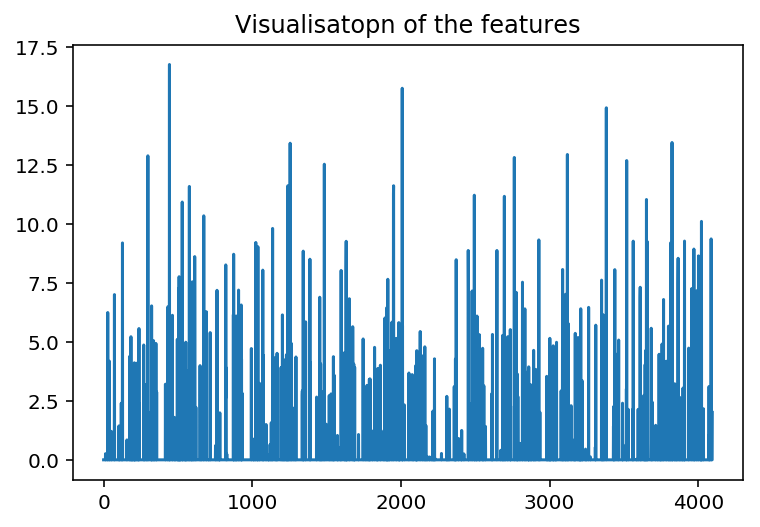

In [474]:
plt.plot(caffe_ft.data[0])
plt.title('Visualisatopn of the features');

### Next steps

- Feedback
- Look for another model for extra modality
- Use PCA to reduce dimensionality
- Get feature vectors for all faces/categories in our dataset
- Send those vectors to Russel so that he can integrate them into his Convnet
- Build up a test set made up of either faces from the training set or a new interesting one like faces from renaissance paintings and see how well our model does

![img](https://s-media-cache-ak0.pinimg.com/236x/dc/3a/4f/dc3a4f431af3f990e0a83509dc48f1f9.jpg)